# OpenCV and matplotlib

A histogram represents
the distribution of pixel intensities (whether color or grayscale)
in an image. It can be visualized as a graph (or plot)
that gives a high-level intuition of the intensity (**pixel value**)
distribution.

In [2]:
# 
# Based environment:
# 
from __future__ import print_function
from  matplotlib import pyplot as plt
%matplotlib inline
import cv2
import numpy as np
import pandas as pd

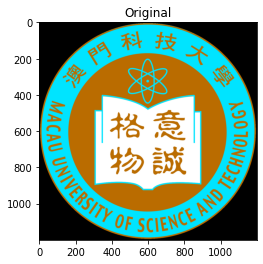

In [9]:
image = cv2.imread("../img_source/must_logo.png")
plt.imshow(image)
plt.title('Original')
plt.show()

## Color Histogram

2D histogram shape: (32, 32), with 1024 values
3D histogram shape: (8, 8, 8), with 512 values


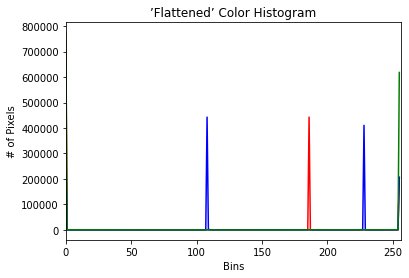

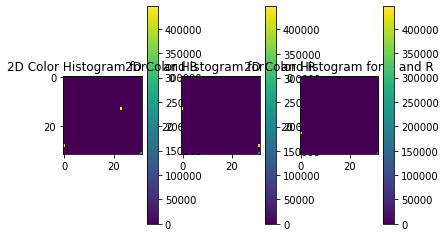

-1

In [4]:

chans=cv2.split(image)
colors=("r","b","g")

plt.figure()
plt.title("’Flattened’ Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for (chan, color) in zip(chans,colors):
    hist=cv2.calcHist([chan],[0],None,[256],[0,256])
    plt.plot(hist,color=color)
    plt.xlim([0,256])

fig = plt.figure()
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None,
[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None,
[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None,
[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

print("2D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))

hist = cv2.calcHist([image], [0, 1, 2],None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))

plt.show()
cv2.waitKey(0)

## Mask Histogram

Text(0.5, 1.0, 'Mask Applied to Imag')

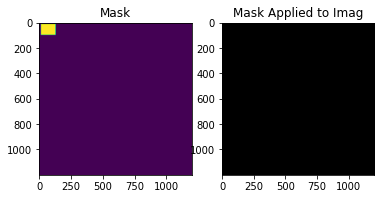

In [5]:
def plot_histogram(image, title, mask = None):
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")

    for (chan, color) in zip(chans, colors):
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        plt.plot(hist, color = color)
        plt.xlim([0, 256])

mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.rectangle(mask, (15, 15), (130, 100), 255, -1)
plt.subplot(1,2,1)
plt.imshow(mask)
plt.title("Mask")

masked = cv2.bitwise_and(image, image, mask = mask)
plt.subplot(1,2,2)
plt.imshow(masked)
plt.title("Mask Applied to Imag")

### Expanding

(<AxesSubplot:title={'center':'CONSTANT'}>,
 Text(0.5, 1.0, 'CONSTANT'))

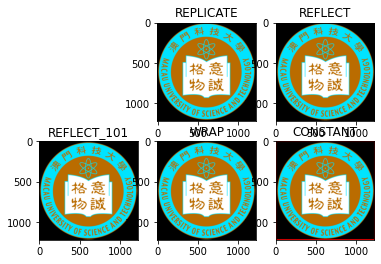

In [6]:
BLUE=[255,0,0]
replicate = cv2.copyMakeBorder(image,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(image,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(image,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(image,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(image,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

# plt.subplot(231),plt.imshow(image,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

### Equalization

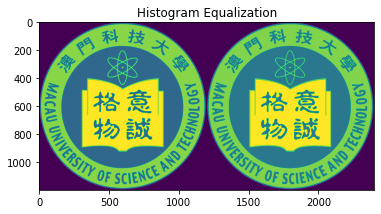

In [7]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
eq = cv2.equalizeHist(image)
plt.imshow(np.hstack([image,eq]))
plt.title("Histogram Equalization")
plt.show()

## Grayscale Histogram

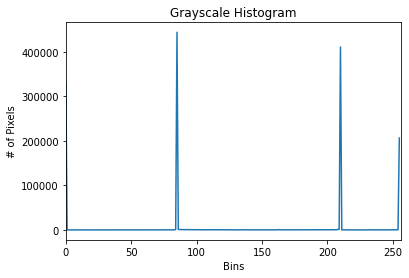

In [10]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()